# Movie Reviews Sentiment Analysis

----------

* This project is based on the reviews provided by the people after watching the movies.
* Here based on the reviews, we gonna classify the movie revies as either **Positive** or **Negative** sentiment
* For this we use **Natural Language Processing** for process the reviews.

----------

### Steps :
1. Problem
2. Import the required packages and load the data
3. EDA and Preprocess the data
4. Feature Engineering
5. Model Selection and Training
6. Evaluate the Model Performance

-----------

## 1. Probelm :
    Classify the reviews of movies into either a positive sentiment or a negative sentiment review.
    
-----------

## 2. Import the required packages and load the data

In [1]:
# Import the required libraries

import numpy as np # For Linear Algebra
import pandas as pd # For Data Handling
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For Data Visualization
import re # For regex operations

# NLP libraries
from nltk.corpus import stopwords # For using the pre-built stopwords
from nltk.tokenize import word_tokenize # For tokennization
from nltk.stem import SnowballStemmer # For stemming 

# ML components
from sklearn.model_selection import train_test_split # For splitting the dataset into train and test sets
from sklearn.feature_extraction.text import CountVectorizer # For Vectorization of the text
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB # ML models to be used for classification
from sklearn.metrics import confusion_matrix # For creating the confusion matrix for the model's prediciton
from sklearn.metrics import accuracy_score, precision_score, recall_score # For calculating the different kinds of scores

import pickle # For handling the model

In [2]:
# Load the dataset
data = pd.read_csv('./IMDB-Dataset.csv')
print("Shape of the data : ", data.shape)
data.head()

Shape of the data :  (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


From the above output, we can say that the file has only two columns. **review** and **sentiment**.

## 3. EDA and Preprocess the data

In [3]:
# Let's check the detailed information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


* As you can see that the dataset has **NO-NULL** values.
* And both the columns are of *object* data type.

* Let's count the values of for each classification to check the balance of data

In [4]:
data.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

* We have a very balanced data.
* Let's conver the object type into binary values (0, 1)
* Positive -> 1
* Negative -> 0

In [5]:
# Converting the sentiment into binary values (0, 1)
data.sentiment.replace('positive', 1, inplace=True)
data.sentiment.replace('negative', 0, inplace=True)

data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


### Steps to preprocess the text (Reviews):
    a. Remove the HTML tags
    b. Remove the special characters (punctuations)
    c. Convert everything to lowercase
    d. Remove the stopwords
    e. Stemming

-------------

**a. Remove the HTML tags**

In [6]:
# Pattern for HTML tags using regex
# pattern = r'<.*?>'

# Define a function which takes text and reemoves HTML tags
def cleanHTML(text):
    cleaned = re.compile(r'<.*?>') # This will compile the regex, returns object pattern
    return re.sub(cleaned, ' ', text) # Return the text by substituting the HTML tags with blank space

In [7]:
# Pass the each review to the function and store it in the same location
data['review'] = data.review.apply(cleanHTML)

data.review.head(10)

0    One of the other reviewers has mentioned that ...
1    A wonderful little production.   The filming t...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing, fresh & innovative i...
8    Encouraged by the positive comments about this...
9    If you like original gut wrenching laughter yo...
Name: review, dtype: object

**b. Remove the special characters (punctuations)**

In [8]:
# Remove the characters which are neither an alphabet nor a digit

# REGEX pattern for a character which is neither an alphabet nor a digit
pattern = r'[^a-zA-Z0-9]'

def cleanSpecialCh(text):
    return re.sub(pattern, ' ', text)

In [9]:
# Apply the above function to each of the review

data['review'] = data.review.apply(cleanSpecialCh)

data.review.head(10)

0    One of the other reviewers has mentioned that ...
1    A wonderful little production    The filming t...
2    I thought this was a wonderful way to spend ti...
3    Basically there s a family where a little boy ...
4    Petter Mattei s  Love in the Time of Money  is...
5    Probably my all time favorite movie  a story o...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing  fresh   innovative i...
8    Encouraged by the positive comments about this...
9    If you like original gut wrenching laughter yo...
Name: review, dtype: object

**c. Convert everything to lowercase**

In [10]:
# Define a function for converting all the letters to lowercase
def to_lower(text):
    return text.lower()

In [11]:
# Apply the above function to each review
data['review'] = data.review.apply(to_lower)

data.review.head(10)

0    one of the other reviewers has mentioned that ...
1    a wonderful little production    the filming t...
2    i thought this was a wonderful way to spend ti...
3    basically there s a family where a little boy ...
4    petter mattei s  love in the time of money  is...
5    probably my all time favorite movie  a story o...
6    i sure would like to see a resurrection of a u...
7    this show was an amazing  fresh   innovative i...
8    encouraged by the positive comments about this...
9    if you like original gut wrenching laughter yo...
Name: review, dtype: object

**d. Remove the stopwords**

In [12]:
# To remove the stopwords from the reviewa
# We make use of the pre-built stopwords library from :
#  NLTK.corpus

def cleanStopwords(text):
    stopWords = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    return [tk for tk in tokens if tk not in stopWords]

In [13]:
# Apply the above function to each review
data['review'] = data['review'].apply(cleanStopwords)

data['review'].head(10)

0    [one, reviewers, mentioned, watching, 1, oz, e...
1    [wonderful, little, production, filming, techn...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, family, little, boy, jake, thinks,...
4    [petter, mattei, love, time, money, visually, ...
5    [probably, time, favorite, movie, story, selfl...
6    [sure, would, like, see, resurrection, dated, ...
7    [show, amazing, fresh, innovative, idea, 70, f...
8    [encouraged, positive, comments, film, looking...
9    [like, original, gut, wrenching, laughter, lik...
Name: review, dtype: object

**e. Stemming**

In [14]:
# Define a function which stem the words
def stem_words(text):
    ss = SnowballStemmer('english')
    return ' '.join([ss.stem(tk) for tk in text])

In [15]:
# Apply the above funvtion to each review
data['review'] = data['review'].apply(stem_words)

data['review'].head(10)

0    one review mention watch 1 oz episod hook righ...
1    wonder littl product film techniqu unassum old...
2    thought wonder way spend time hot summer weeke...
3    basic famili littl boy jake think zombi closet...
4    petter mattei love time money visual stun film...
5    probabl time favorit movi stori selfless sacri...
6    sure would like see resurrect date seahunt ser...
7    show amaz fresh innov idea 70 first air first ...
8    encourag posit comment film look forward watch...
9    like origin gut wrench laughter like movi youn...
Name: review, dtype: object

## 4. Feature Engineering
    
--------------

**Bag-Of-Words(BOW)** : 
* Is used to preprocess the text **to classify before fitting classification algorithms** on the observations containing text
* Is used for **text-vectorization**
* The idea is to *count the number of times each word has appeared in a text* without considering it's position or grammatical role

**Text-Vectorization :**
* The process of transforming tokens(words) into numbers that can be used as input into machine learning or statistical models.
* After the transformation, each token will be represented by a **unique vector**

In [16]:
data['tokenCount'] = data.review.apply(lambda txt : len(txt.split()))

data.head()

,review,sentiment,tokenCount
0,one review mention watch 1 oz episod hook righ...,1,163
1,wonder littl product film techniqu unassum old...,1,86
2,thought wonder way spend time hot summer weeke...,1,85
3,basic famili littl boy jake think zombi closet...,0,66
4,petter mattei love time money visual stun film...,1,125


In [17]:
data.tokenCount.describe()

count    50000.00000
mean       119.59440
std         90.29857
min          3.00000
25%         64.00000
50%         89.00000
75%        145.00000
max       1435.00000
Name: tokenCount, dtype: float64

In [18]:
data.loc[data.tokenCount < 5]

,review,sentiment,tokenCount
19874,movi terribl good effect,0,4
27521,read book forget movi,0,4
31072,script stori mess,0,3


<Axes: >

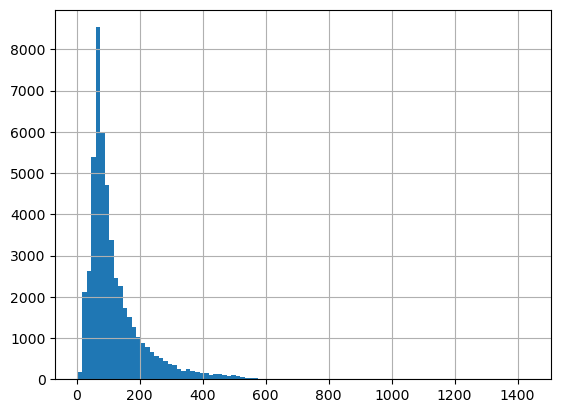

In [19]:
data.tokenCount.hist(bins=100)

In [20]:
# Now create a BAg-Of-Words model

cv = CountVectorizer(max_features=1000)
X = cv.fit_transform(data.review)
X.shape

(50000, 1000)

In [21]:
# Lets create a doc-term matrix

# Extract the elements of vocabulary
vocab = cv.get_feature_names_out()

docterm = pd.DataFrame(X.todense(), columns=vocab)
docterm.head()

,10,20,30,80,abil,abl,absolut,accent,accept,achiev,...,writer,written,wrong,wrote,year,yes,yet,york,young,zombi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# Let's create the feature and labels

X = X.toarray()
y = data.sentiment

print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (50000, 1000)
y shape :  (50000,)


In [23]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

## 5. Model Selection and Training

Here we use Naive Bayes models such as `MultinomialNB`, `GaussianNB`, `BernoulliNB`

---------------

First split the features and labels into training set and test set

In [25]:
# SPlit the data set into train and test set, alloting test set with 20% of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

print(f"Shape of train set : X = {X_train.shape}, y = {y_train.shape}")
print(f"Shape of test set : X = {X_test.shape}, y = {y_test.shape}")

Shape of train set : X = (40000, 1000), y = (40000,)
Shape of test set : X = (10000, 1000), y = (10000,)


Create an object for each of the models and train them


In [26]:
gnb, mnb, bnb = GaussianNB(), MultinomialNB(alpha=1.0, fit_prior=True), BernoulliNB(alpha=1.0, fit_prior=True) 

# Train the models
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

BernoulliNB()

## 6. Evaluate the Model's Performance

In [27]:
# Get the predictions for test set
y_pred_g = gnb.predict(X_test)
y_pred_m = mnb.predict(X_test)
y_pred_b = bnb.predict(X_test)

Let's create a confusion matrix for each model using `ConfusionMatrixDisplay`, and display the different scores

Gaussian NB Model
Accuracy Score : 0.7843
Precison score : 0.8150134048257373
Recall Score : 0.7329716696805304


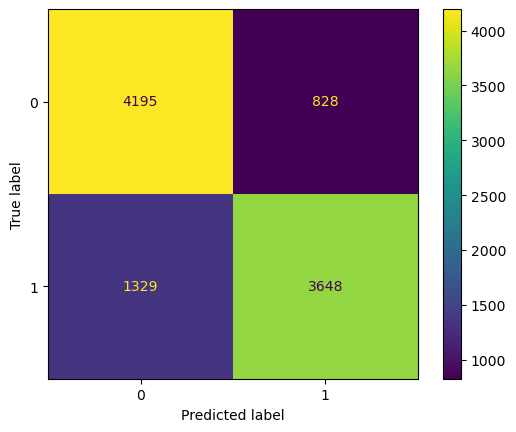

In [28]:
# For Gaussian NB Model

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_g)

print("Gaussian NB Model")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_g)}")
print(f"Precison score : {precision_score(y_test, y_pred_g)}")
print(f"Recall Score : {recall_score(y_test, y_pred_g)}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()

MultiNominal NB Model
Accuracy Score : 0.8311
Precison score : 0.8281437125748503
Recall Score : 0.833634719710669


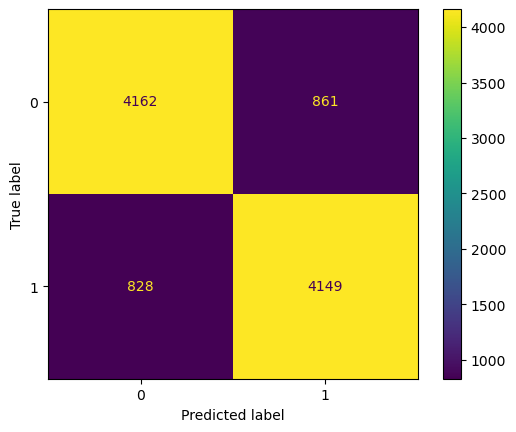

In [29]:
# For MultiNominal NB Model

cm = confusion_matrix(y_test, y_pred_m)

print("MultiNominal NB Model")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_m)}")
print(f"Precison score : {precision_score(y_test, y_pred_m)}")
print(f"Recall Score : {recall_score(y_test, y_pred_m)}")


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot()

Bernouli NB Model
Accuracy Score : 0.8381
Precison score : 0.8255137650252036
Recall Score : 0.8555354631303999


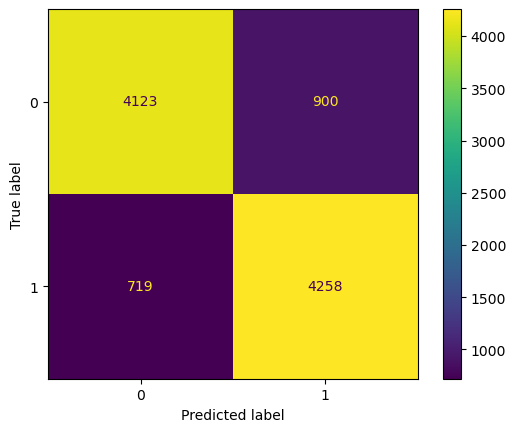

In [30]:
# For Bernouli NB Model

cm = confusion_matrix(y_test, y_pred_b)

print("Bernouli NB Model")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_b)}")
print(f"Precison score : {precision_score(y_test, y_pred_b)}")
print(f"Recall Score : {recall_score(y_test, y_pred_b)}")


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bnb.classes_)
disp.plot()

### Save the models using pickle

In [31]:
# Bernouli NB model

pickle.dump(bnb, open('./Models/bernouli.pkl', 'wb'))

# Gaussian NB Model
pickle.dump(gnb, open('./Models/gaussian.pkl', 'wb'))

# Multinominal NB model
pickle.dump(mnb, open('./Models/multinominal.pkl', 'wb'))

## Now check he model with random movie review

In [32]:
# Review taken from 'KGF-2' movie
# Should result in positive
review = 'It is a battering ram of a movie. It is designed to pound the audience to submission.'

# Preprocessign it using the defined functions
f1 = cleanHTML(review)
f2 = cleanSpecialCh(f1)
f3 = to_lower(f2)
f4 = cleanStopwords(f3)
final_review = stem_words(f4)

bow, words = [], word_tokenize(review)

for word in words:
    bow.append(words.count(word))

# This is to making standard vector 
word_dict_ = cv.vocabulary_ # 'cv' is the CountVectorizer

# Saving the standard dictinary of words
pickle.dump(word_dict_, open('./Models/Vocabulary', 'wb'))

In [33]:
# Creating an input out of the processed review 
inp = []
for i in word_dict_:
    inp.append(final_review.count(i))


In [34]:
# Use the created input to predict the movie sentiment

# We use Bernouli NB model

sentiment = bnb.predict(np.array(inp).reshape(1, 1000))

In [35]:
# Decode the sentiment
# IF prediction is 0 -> Negative; 1 -> Positive

if sentiment==1 :
    print("Positive review about the movie")
else :
    print("Negative review about the movie")
        

Positive review about the movie
